# Cu LMM XPS Analysis

In [6]:
# Libraries
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt


In [137]:
# Function to interpolate
def interpolate(x, y):
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")
    xnew = np.arange(565, 580, 0.25)
    return xnew, f(xnew)

def normalize(y):
    return ((y) - min(y))/(max(y)-min(y))

In [138]:
df = pd.DataFrame()
drctry = './CuOx/Cu_LMM/'
for file in files:
    if 'Cu' in file:
        data = pd.read_table(os.path.join(drctry, file))
        data = data[::-1]
        data = data.drop_duplicates(subset='x', keep="last")
        x = np.asarray(data.x)
        y = np.asarray(data.y)
        xnew, fnew = interpolate(x, y)
        df['xnew'] = xnew
        df[file] = normalize(fnew)
        

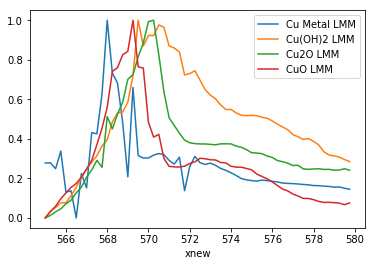

In [139]:
df.plot(x="xnew")